In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=2245840220338bcdf085bacc4cd1d84d5e3aa323bb7a77a7784f9150ad7e89ef
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install bsedata

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf
from  bsedata.bse import BSE

In [ ]:
df = yf.download("DRREDDY.NS").reset_index()

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,56.400002,56.500000,55.750000,55.750000,48.574963,2800
1,1996-01-02,55.750000,55.750000,55.262501,55.275002,48.161102,8400
2,1996-01-03,55.275002,55.625000,55.250000,55.299999,48.182880,11200
3,1996-01-04,55.299999,53.750000,53.037498,53.312500,46.451180,3600
4,1996-01-05,53.312500,53.987499,52.000000,52.049999,45.351151,12000
5,1996-01-08,52.049999,53.500000,51.250000,51.375000,44.763023,12400
6,1996-01-09,51.375000,51.500000,49.250000,49.950001,43.521420,18000
7,1996-01-10,49.950001,51.012501,50.012501,50.737499,44.207581,6800
8,1996-01-11,50.737499,52.000000,51.250000,51.875000,45.198685,5600
9,1996-01-12,51.875000,52.250000,52.000000,52.000000,45.307598,4800


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6470.000000,6470.000000,6470.000000,6470.000000,6470.000000,6.470000e+03
mean,1436.882834,1455.178460,1417.056237,1435.489656,1357.605317,5.026074e+05
std,1350.857096,1364.906623,1334.368060,1348.724119,1322.310634,6.217924e+05
min,38.262501,38.887501,38.012501,38.849998,33.849991,0.000000e+00
25%,380.500000,387.137505,373.750000,380.018753,334.045029,2.052052e+05
50%,715.000000,726.250000,703.012512,713.575012,634.611420,3.461500e+05
75%,2465.000000,2498.737488,2433.612488,2464.612488,2357.904968,6.020460e+05
max,5580.000000,5614.600098,5531.950195,5575.700195,5524.790527,2.198708e+07


In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
pd.date_range('2002-07-01', '2021-06-30')

DatetimeIndex(['2002-07-01', '2002-07-02', '2002-07-03', '2002-07-04',
               '2002-07-05', '2002-07-06', '2002-07-07', '2002-07-08',
               '2002-07-09', '2002-07-10',
               ...
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
               '2021-06-29', '2021-06-30'],
              dtype='datetime64[ns]', length=6940, freq='D')

In [ ]:
df['Date'].reindex(pd.date_range('2002-07-01', '2021-06-30')).isnull()

2002-07-01    True
2002-07-02    True
2002-07-03    True
2002-07-04    True
2002-07-05    True
              ... 
2021-06-26    True
2021-06-27    True
2021-06-28    True
2021-06-29    True
2021-06-30    True
Freq: D, Name: Date, Length: 6940, dtype: bool

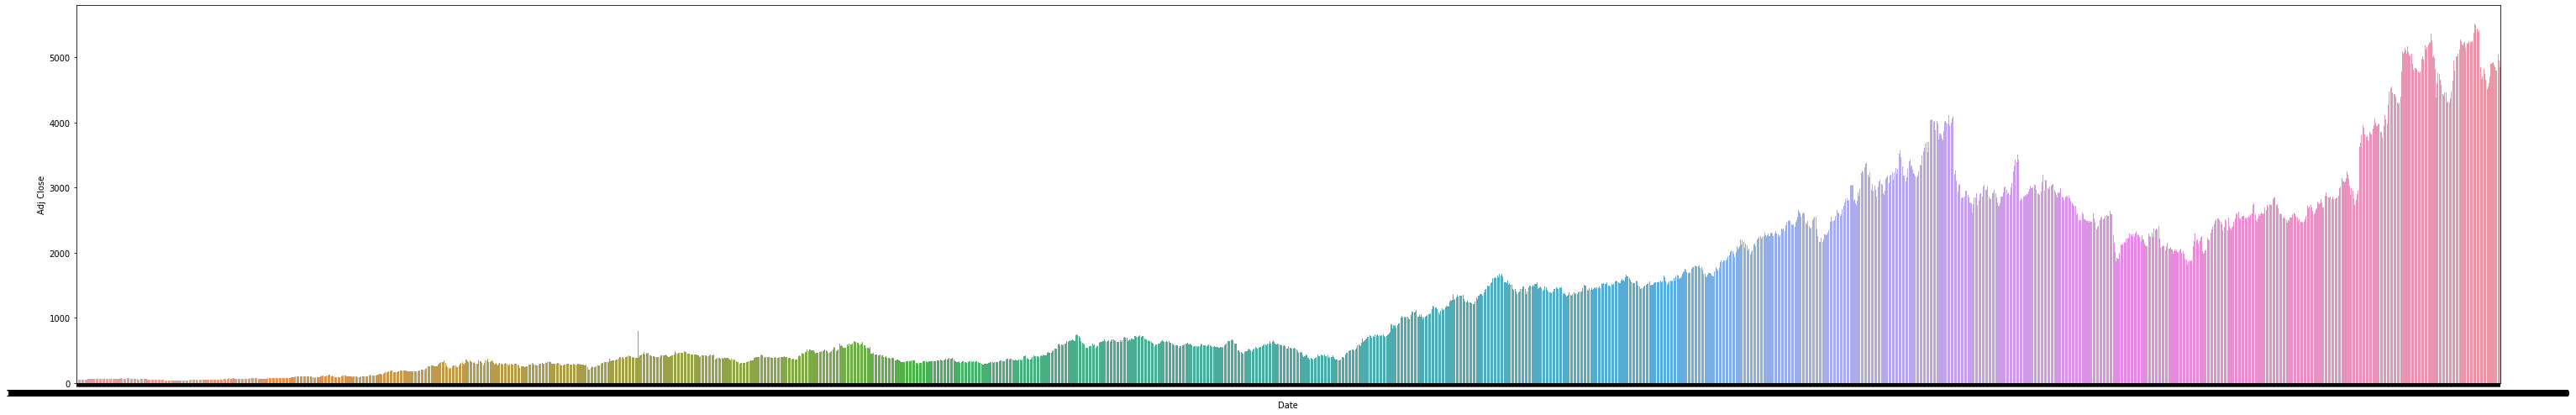

In [ ]:
a4_dims = (51.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(x='Date',y='Adj Close',data=df)

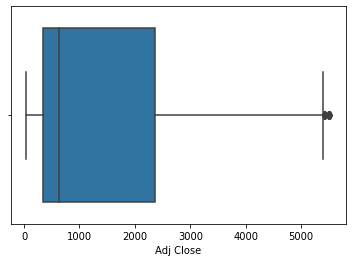

In [ ]:
sns.boxplot(x="Adj Close", data=df)

The Facebook Prophet Model

In [ ]:
pip install prophet

In [ ]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
df_new = df[['Date','Adj Close']]

In [ ]:
df_new.head()

,Date,Adj Close
0,1996-01-01,48.574959
1,1996-01-02,48.161095
2,1996-01-03,48.182877
3,1996-01-04,46.451168
4,1996-01-05,45.351154


In [ ]:
df_new = df_new.rename(columns={'Date': 'ds','Adj Close':'y'})             
df_new.isna().sum()

ds    0
y     0
dtype: int64

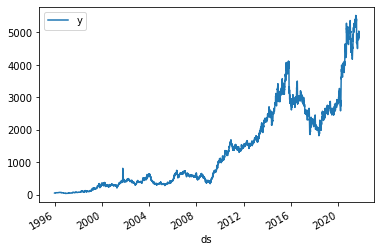

In [ ]:
df_new.plot(x='ds')

In [ ]:
train=df_new[df_new['ds']<'2021-06-24']
test=df_new[df_new['ds']>='2021-06-24']

In [ ]:
test

,ds,y
6396,2021-06-24,5229.460938
6397,2021-06-25,5260.822266
6398,2021-06-28,5354.905273
6399,2021-06-29,5383.492188
6400,2021-06-30,5373.533691
...,...,...
6465,2021-10-04,5042.700195
6466,2021-10-05,5034.600098
6467,2021-10-06,4956.600098
6468,2021-10-07,4891.100098


In [ ]:
from fbprophet import Prophet
model1=Prophet()
model1.add_country_holidays(country_name='IN')
model1.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



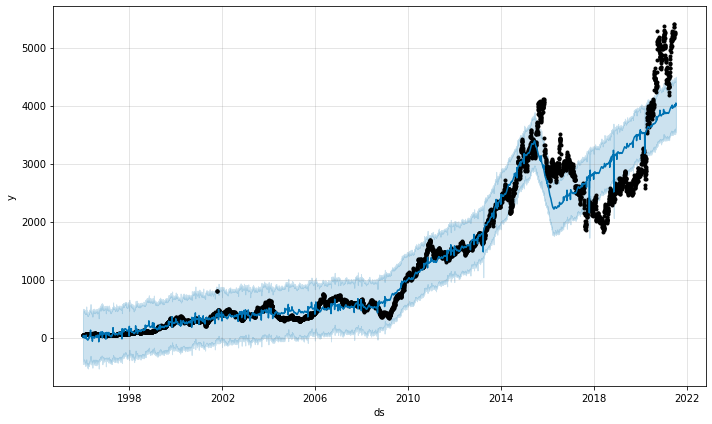

In [ ]:
future = model1.make_future_dataframe(periods=19)

fcst = model1.predict(future)
fig = model1.plot(fcst)

In [ ]:
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Saints Day,All Saints Day_lower,All Saints Day_upper,All Souls Day,All Souls Day_lower,All Souls Day_upper,Boxing Day,Boxing Day_lower,Boxing Day_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Day of Ashura,Day of Ashura_lower,Day of Ashura_upper,Diwali,Diwali_lower,Diwali_upper,Easter Sunday,Easter Sunday_lower,Easter Sunday_upper,Eid al-Fitr,Eid al-Fitr_lower,Eid al-Fitr_upper,Feast of Holy Family,Feast of Holy Family_lower,Feast of Holy Family_upper,Feast of Pentecost,Feast of Pentecost_lower,Feast of Pentecost_upper,Feast of the Blessed Virgin,Feast of the Blessed Virgin_lower,Feast of the Blessed Virgin_upper,Feast of the Sacrifice,...,Good Friday,Good Friday_lower,Good Friday_upper,Holi,Holi_lower,Holi_upper,Independence Day,Independence Day_lower,Independence Day_upper,Maundy Thursday,Maundy Thursday_lower,Maundy Thursday_upper,Mawlid,Mawlid_lower,Mawlid_upper,New Year's Day,New Year's Day_lower,New Year's Day_upper,Palm Sunday,Palm Sunday_lower,Palm Sunday_upper,Republic Day,Republic Day_lower,Republic Day_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,8.935060,-453.203073,416.549819,8.935060,8.935060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-21.082198,-21.082198,-21.082198,0.0,0.0,0.0,0.0,0.0,0.0,-7.119854,-7.119854,-7.119854,-21.082198,-21.082198,-21.082198,-9.754183,-9.754183,-9.754183,23.716527,23.716527,23.716527,0.0,0.0,0.0,1.815206
1,1996-01-02,9.079257,-385.560817,451.281703,9.079257,9.079257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,18.076495,18.076495,18.076495,0.000000,0.000000,0.000000,-6.595192,-6.595192,-6.595192,24.671687,24.671687,24.671687,0.0,0.0,0.0,27.155752
2,1996-01-03,9.223454,-404.863832,463.489315,9.223454,9.223454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,19.027506,19.027506,19.027506,0.000000,0.000000,0.000000,-6.642026,-6.642026,-6.642026,25.669532,25.669532,25.669532,0.0,0.0,0.0,28.250960
3,1996-01-04,9.367651,-410.739236,461.120699,9.367651,9.367651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,19.440734,19.440734,19.440734,0.000000,0.000000,0.000000,-7.237635,-7.237635,-7.237635,26.678369,26.678369,26.678369,0.0,0.0,0.0,28.808385
4,1996-01-05,9.511848,-412.593110,494.522810,9.511848,9.511848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,18.631502,18.631502,18.631502,0.000000,0.000000,0.000000,-9.032618,-9.032618,-9.032618,27.664119,27.664119,27.664119,0.0,0.0,0.0,28.143349


In [ ]:
forecast = model1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(19)

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030

/usr/local/lib/python3.7/dist-packages/fbprophet/hdays.py:259: Warning:

We only support Diwali and Holi holidays from 2010 to 2030



,ds,yhat,yhat_lower,yhat_upper
6396,2021-06-24,3982.199166,3536.688284,4442.281961
6397,2021-06-25,3980.508552,3535.240246,4419.137858
6398,2021-06-26,4009.554213,3546.659279,4474.520291
6399,2021-06-27,4010.229619,3550.351572,4459.554625
6400,2021-06-28,3981.821308,3543.258116,4446.425996
6401,2021-06-29,3986.258892,3545.989775,4438.923759
6402,2021-06-30,3987.785731,3521.893889,4431.178105
6403,2021-07-01,3989.044826,3543.731900,4416.124547
6404,2021-07-02,3989.364710,3557.071864,4419.408502
6405,2021-07-03,4020.376080,3584.699665,4450.834728


LSTM Model


In [ ]:
#Considering Required Features for LSTM
dfreg = df.loc[:,['Adj Close','Volume']]

In [ ]:
dfreg['Percentage_HL'] = (df['High'] - df['Low']) / df['Adj Close'] * 100.0
dfreg['Percentage_change'] = (df['Adj Close'] - df['Open']) / df['Open'] * 100.0

In [ ]:
dfreg.head()

,Adj Close,Volume,Percentage_HL,Percentage_change
0,48.574963,2800,1.544005,-13.874182
1,48.161102,8400,1.012226,-13.612373
2,48.182880,11200,0.778285,-12.830612
3,46.451180,3600,1.533872,-16.001483
4,45.351151,12000,4.382467,-14.933364


In [ ]:
dfreg

,Adj Close,Volume,Percentage_HL,Percentage_change
0,48.574959,2800,1.544005,-13.874189
1,48.161095,8400,1.012226,-13.612386
2,48.182877,11200,0.778285,-12.830619
3,46.451168,3600,1.533872,-16.001503
4,45.351154,12000,4.382467,-14.933356
...,...,...,...,...
6465,5042.700195,760353,2.518492,1.769933
6466,5034.600098,354847,1.589004,-0.049632
6467,4956.600098,529264,2.731719,-1.213750
6468,4891.100098,343974,2.186619,-1.704210


In [ ]:
df1 = dfreg['Adj Close']

In [ ]:
num_training_examples = int(0.8 *df1.shape[0])
num_training_examples

5176

In [ ]:
df1.index = df['Date']

In [ ]:
df1.head(10)

Date
1996-01-01    48.574963
1996-01-02    48.161102
1996-01-03    48.182880
1996-01-04    46.451180
1996-01-05    45.351151
1996-01-08    44.763023
1996-01-09    43.521420
1996-01-10    44.207581
1996-01-11    45.198685
1996-01-12    45.307598
Name: Adj Close, dtype: float64

In [ ]:
df1.tail(10)

Date
2021-09-27    4791.649902
2021-09-28    4833.149902
2021-09-29    4881.000000
2021-09-30    4880.700195
2021-10-01    4955.850098
2021-10-04    5042.700195
2021-10-05    5034.600098
2021-10-06    4956.600098
2021-10-07    4891.100098
2021-10-08    4849.200195
Name: Adj Close, dtype: float64

In [ ]:
df1.shape

(6470,)

In [ ]:
train_data = df1.to_list()[:num_training_examples]
test_data = df1.to_list()[num_training_examples:]

In [ ]:
print(train_data[:100])

[48.5749626159668, 48.161102294921875, 48.18288040161133, 46.45117950439453, 45.35115051269531, 44.763023376464844, 43.521419525146484, 44.20758056640625, 45.19868469238281, 45.30759811401367, 45.30759811401367, 44.70857620239258, 44.8719482421875, 44.556087493896484, 44.66500473022461, 44.51253128051758, 45.24224090576172, 45.601654052734375, 46.17888641357422, 46.17888641357422, 46.23335647583008, 46.3095817565918, 46.854148864746094, 46.66899871826172, 48.79278564453125, 50.09973907470703, 49.555179595947266, 50.132415771484375, 51.842342376708984, 53.78099060058594, 56.48201370239258, 57.7889518737793, 57.60380935668945, 58.191932678222656, 58.48599624633789, 57.832523345947266, 58.52956771850586, 58.52956771850586, 57.985008239746094, 58.57313537597656, 58.66025924682617, 57.39688491821289, 56.41666793823242, 56.63447952270508, 56.536476135253906, 56.86320495605469, 56.86320495605469, 57.81074905395508, 57.723609924316406, 55.54536819458008, 56.645381927490234, 57.04835510253906, 

In [ ]:
mean = np.array(train_data).mean()
std = np.array(train_data).std()

In [ ]:
print("Mean : ",mean)
print("Std : ", std)

Mean :  905.3750609791445
Std :  945.2048153363049


In [ ]:
#Normalizing the data
norm_train = (np.array(train_data) - mean)/std
norm_test  = (np.array(test_data) - mean)/std

In [ ]:
norm_train[:100]

array([-0.90647031, -0.90690816, -0.90688512, -0.90871721, -0.90988101,
       -0.91050323, -0.91181681, -0.91109087, -0.91004231, -0.90992709,
       -0.90992709, -0.91056083, -0.91038799, -0.91072216, -0.91060693,
       -0.91076824, -0.90999623, -0.90961598, -0.90900529, -0.90900529,
       -0.90894766, -0.90886702, -0.90829088, -0.90848676, -0.90623986,
       -0.90485714, -0.90543326, -0.90482256, -0.90301351, -0.90096248,
       -0.89810487, -0.89672217, -0.89691804, -0.89629582, -0.89598471,
       -0.89667607, -0.89593862, -0.89593862, -0.89651474, -0.89589252,
       -0.89580035, -0.89713696, -0.898174  , -0.89794356, -0.89804725,
       -0.89770158, -0.89770158, -0.8966991 , -0.8967913 , -0.89909581,
       -0.89793203, -0.8975057 , -0.89748265, -0.89796659, -0.89860035,
       -0.89772461, -0.8984736 , -0.8984736 , -0.89778224, -0.89780528,
       -0.89769006, -0.89755178, -0.89794356, -0.89725218, -0.89792051,
       -0.89702174, -0.89758635, -0.8967913 , -0.8964456 , -0.89

In [ ]:
norm_train.shape

(5176,)

In [ ]:
def prepare_data(dataset, window_size=20):

    dX, dY = [], []
    
    for i in range(len(dataset)-window_size):
        
        #Prepare input features
        input_features = dataset[i:(i+window_size)]        
        dX.append(input_features)

        #Prepare Label
        label = dataset[i + window_size]
        dY.append(label)
    
    return np.array(dX), np.array(dY)

In [ ]:
#Prepare x,y for train and test
train_x, train_y = prepare_data(norm_train)
test_x, test_y = prepare_data(norm_test)

In [ ]:
train_x.shape

(5156, 20)

In [ ]:
train_y.shape

(5156,)

In [ ]:
train_x[0]

array([-0.90647031, -0.90690816, -0.90688512, -0.90871721, -0.90988101,
       -0.91050323, -0.91181681, -0.91109087, -0.91004231, -0.90992709,
       -0.90992709, -0.91056083, -0.91038799, -0.91072216, -0.91060693,
       -0.91076824, -0.90999623, -0.90961598, -0.90900529, -0.90900529])

In [ ]:
train_y[0]

-0.908947659346859

In [ ]:
import tensorflow as tf
tf.random.set_seed(13)

In [ ]:
#Build Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

#Add LSTM layer
model.add(tf.keras.layers.LSTM(8, input_shape=(train_x.shape[1], 1,)))

#Add Output layer
model.add(tf.keras.layers.Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mae', metrics='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_x.shape

(5156, 20)

In [ ]:
train_x = np.expand_dims(train_x, axis=2)
test_x = np.expand_dims(test_x, axis=2)

In [ ]:
model.fit(train_x, train_y,
          validation_data=(test_x, test_y),
          epochs=20, 
          batch_size=256)

Epoch 1/20
21/21 [==============================] - 3s 38ms/step - loss: 0.5457 - mse: 0.5499 - val_loss: 1.8739 - val_mse: 4.5402
Epoch 2/20
21/21 [==============================] - 0s 13ms/step - loss: 0.4122 - mse: 0.4283 - val_loss: 1.7680 - val_mse: 4.1209
Epoch 3/20
21/21 [==============================] - 0s 12ms/step - loss: 0.3205 - mse: 0.3422 - val_loss: 1.6023 - val_mse: 3.5458
Epoch 4/20
21/21 [==============================] - 0s 12ms/step - loss: 0.2586 - mse: 0.2525 - val_loss: 1.3867 - val_mse: 2.9027
Epoch 5/20
21/21 [==============================] - 0s 13ms/step - loss: 0.1834 - mse: 0.1686 - val_loss: 1.1346 - val_mse: 2.2823
Epoch 6/20
21/21 [==============================] - 0s 14ms/step - loss: 0.1359 - mse: 0.1088 - val_loss: 0.9513 - val_mse: 1.8344
Epoch 7/20
21/21 [==============================] - 0s 14ms/step - loss: 0.1074 - mse: 0.0743 - val_loss: 0.7891 - val_mse: 1.4257
Epoch 8/20
21/21 [==============================] - 0s 11ms/step - loss: 0.0760 - m

In [ ]:
input_2=[model,]

In [ ]:
a = model.predict(test_x[0:1])
print('Normalized Prediction', a)

Normalized Prediction [[2.177855]]


In [ ]:
print('De-normalized Prediction', a * std + mean)

De-normalized Prediction [[2963.894]]


In [ ]:
#Actual
test_y[0]*std+mean

2893.2583007812495

Model Building Final(By Combining Time series and Non Time series related featues)

In [ ]:
df2_Target=df['Adj Close']

In [ ]:
df2_Target.index=df['Date']

In [ ]:
train_data_1 = df2_Target.to_list()[:num_training_examples]
test_data_1 = df2_Target.to_list()[num_training_examples:]

In [ ]:
df2_vol=dfreg['Volume']
df2_vol_train = df2_vol.to_list()[:num_training_examples]
df2_vol_test = df2_vol.to_list()[num_training_examples:]

In [ ]:
df2_hl=dfreg['Percentage_HL']
df2_hl_train = df2_hl.to_list()[:num_training_examples]
df2_hl_test = df2_hl.to_list()[num_training_examples:]

In [ ]:
df2_change=dfreg['Percentage_change']
df2_change_train = df2_change.to_list()[:num_training_examples]
df2_change_test = df2_change.to_list()[num_training_examples:]

In [ ]:
mean_target = np.array(train_data_1).mean()
std_targer = np.array(train_data_1).std()

In [ ]:
mean_vol = np.array(df2_vol_train).mean()
std_vol = np.array(df2_vol_train).std()

In [ ]:
mean_hl = np.array(df2_hl_train).mean()
std_hl = np.array(df2_hl_train).std()

In [ ]:
mean_change = np.array(df2_change_train).mean()
std_change = np.array(df2_change_train).std()

In [ ]:
#Normalizing the data
norm_train_1 = (np.array(train_data_1) - mean_target)/std_targer
norm_test_1  = (np.array(test_data_1) - mean_target)/std_targer
norm_train_vol = (np.array(df2_vol_train) - mean_vol)/std_vol
norm_test_vol  = (np.array(df2_vol_test) - mean_vol)/std_vol
norm_train_hl = (np.array(df2_hl_train) - mean_hl)/std_hl
norm_test_hl  = (np.array(df2_hl_test) - mean_hl)/std_hl
norm_train_change = (np.array(df2_change_train) - mean_change)/std_change
norm_test_change  = (np.array(df2_change_test) - mean_change)/std_change

In [ ]:
def prepare_data(dataset1,dataset2,dataset3,dataset4, window_size=20):

    dX, dY, nf1, nf2, nf3 = [], [], [], [], []
    
    for i in range(len(dataset1)-window_size):
        
        #Prepare input features
        input_features = dataset1[i:(i+window_size)]        
        dX.append(input_features)

        #Prepare Volume
        label1 = dataset2[i + window_size]
        nf1.append(label1)

        #Prepare HL
        label2 = dataset3[i + window_size]
        nf2.append(label2)

        #Prepare Change
        label3 = dataset4[i + window_size]
        nf3.append(label3)

        #Prepare Label
        label = dataset1[i + window_size]
        dY.append(label)
    
    return np.array(dX), np.array(dY), np.array(nf1), np.array(nf2), np.array(nf3)

In [ ]:
#Prepare x,y for train and test
train_x_lsf, train_y_lsf, train_v_lsf, train_h_lsf, train_c_lsf = prepare_data(norm_train_1,df2_vol_train,df2_hl_train,df2_change_train)
test_x_lsf, test_y_lsf, test_v_lsf, test_h_lsf, test_c_lsf = prepare_data(norm_test_1,df2_vol_test,df2_hl_test,df2_change_test)

In [ ]:
train_x_lsf.shape

(5156, 20)

In [ ]:
#Building LSTM layer for the Time Series Feature
input_1=tf.keras.layers.Input(shape=(20,))
x1=tf.keras.layers.Reshape((20,1,))(input_1)
lstm_layer=tf.keras.layers.LSTM(50)(x1)

#Layers for Non Time Series Features

input_2=tf.keras.layers.Input(shape=(1,))
input_3=tf.keras.layers.Input(shape=(1,))
input_4=tf.keras.layers.Input(shape=(1,))

#Concatenate all the layers

concat_layer=tf.keras.layers.concatenate([lstm_layer, input_2, input_3, input_4])

In [ ]:
dense_layer=tf.keras.layers.Dense(1,activation='sigmoid')(concat_layer)

In [ ]:
#Model Building
model_final=tf.keras.Model([input_1, input_2, input_3,input_4], dense_layer)

In [ ]:
model_final.compile(optimizer='adam', loss='mae',metrics='mse')

In [ ]:
model_final.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 20)]         0                                            
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 20, 1)        0           input_17[0][0]                   
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 50)           10400       reshape_4[0][0]                  
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 1)]          0                                            
____________________________________________________________________________________________

In [ ]:
model_final.fit([train_x_lsf, train_v_lsf,train_h_lsf,train_c_lsf],train_y,epochs=20)

Epoch 1/20
162/162 [==============================] - 4s 11ms/step - loss: 0.8048 - mse: 1.0079
Epoch 2/20
162/162 [==============================] - 2s 10ms/step - loss: 0.8010 - mse: 0.9998
Epoch 3/20
162/162 [==============================] - 2s 10ms/step - loss: 0.8010 - mse: 0.9997
Epoch 4/20
162/162 [==============================] - 2s 11ms/step - loss: 0.8010 - mse: 0.9997
Epoch 5/20
162/162 [==============================] - 2s 11ms/step - loss: 0.8009 - mse: 0.9997
Epoch 6/20
162/162 [==============================] - 2s 10ms/step - loss: 0.8009 - mse: 0.9997
Epoch 7/20
162/162 [==============================] - 2s 10ms/step - loss: 0.8009 - mse: 0.9997
Epoch 8/20
162/162 [==============================] - 2s 10ms/step - loss: 0.8009 - mse: 0.9997
Epoch 9/20
162/162 [==============================] - 2s 11ms/step - loss: 0.8009 - mse: 0.9997
Epoch 10/20
162/162 [==============================] - 2s 11ms/step - loss: 0.8009 - mse: 0.9997
Epoch 11/20
162/162 [==================

ARIMA Model

In [ ]:
## ARIMA 
df = yf.download("DRREDDY.NS").reset_index()

[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



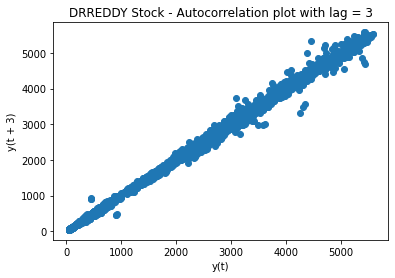

In [ ]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('DRREDDY Stock - Autocorrelation plot with lag = 3')
plt.show()

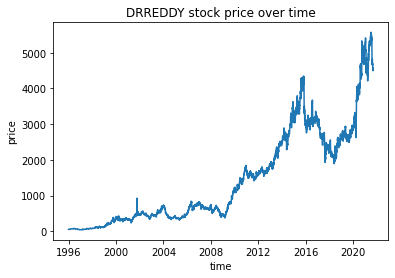

In [ ]:
plt.plot(df["Date"], df["Close"])
plt.title("DRREDDY stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [ ]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(3,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 3646.249166631201


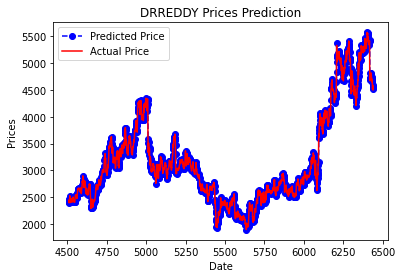

In [ ]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('DRREDDY Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
model_predictions

[array([2461.58335996]),
 array([2438.88132191]),
 array([2424.82911863]),
 array([2404.47179477]),
 array([2395.74242297]),
 array([2411.42970093]),
 array([2401.25299704]),
 array([2427.57971566]),
 array([2521.71692892]),
 array([2448.21312721]),
 array([2460.32792671]),
 array([2418.42630313]),
 array([2399.5506025]),
 array([2422.24381527]),
 array([2403.79680844]),
 array([2468.26511867]),
 array([2468.41488585]),
 array([2459.63869903]),
 array([2462.5285233]),
 array([2467.5996368]),
 array([2453.90612402]),
 array([2427.32530331]),
 array([2414.26587369]),
 array([2438.97773753]),
 array([2442.08920049]),
 array([2408.34207881]),
 array([2429.01831804]),
 array([2460.57557094]),
 array([2480.65242553]),
 array([2492.87434508]),
 array([2462.12773616]),
 array([2450.32923617]),
 array([2422.20587407]),
 array([2427.73027352]),
 array([2459.61978598]),
 array([2450.66959928]),
 array([2437.7741511]),
 array([2405.55204615]),
 array([2405.08909688]),
 array([2407.42286138]),
 arr